<a href="https://colab.research.google.com/github/mekazanc/Computer-Price-Prediction/blob/main/computerPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
# you need to give your path here. It must starts with "%cd My\ Drive/" then add your path in your google drive
%cd My\ Drive/Colab Notebooks/BigDataDev

/gdrive/My Drive/Colab Notebooks/BigDataDev


In [ ]:
%ls -l

total 853
drwx------ 2 root root   4096 Mar 31 15:31 'Assignment 2'/
drwx------ 2 root root   4096 Apr  8 13:43 'Assignment 3'/
-rw------- 1 root root 426137 Apr 17 23:11  bigdata.ipynb
drwx------ 2 root root   4096 Apr 17 00:28  catboost_info/
-rw------- 1 root root 128822 Apr  6 18:47 'Computer gaming.ipynb'
drwx------ 2 root root   4096 Apr 17 10:16  finalData/
-rw------- 1 root root   9417 Apr  6 23:17  test111.csv
-rw------- 1 root root   9242 Apr  6 00:13  test11.csv
-rw------- 1 root root   8952 Apr  5 23:33  test1.csv
-rw------- 1 root root  78300 Mar 16 10:35  test.csv
-rw------- 1 root root   9466 Apr 17 18:37  testNew.csv
-rw------- 1 root root 183865 Mar 16 10:35  train.csv


##Computer Price Prediction Analysis
## 1. Data Exploration 
First of all, let's import data by pandas library

In [ ]:
import pandas as pd
# Import data 
dfTrain = pd.read_csv("train.csv")
dfTrain.head()

,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,min_price,max_price
0,7774,Lenovo Flex 3 15.6-Inch Touchscreen Laptop (Co...,Lenovo,Lenovo Flex 3 80JM002CUS,15.6,1920,1080,Glossy,1,Intel Core i7,Intel Core i7-5500U 2.40 GHz (5th gen Broadwel...,0.0,0,Intel HD,Windows,Windows 10,8,0,1000,4.60,899.00,899.00
1,25926,Razer Blade 15 Gaming Laptop: Intel Core i7-87...,Razer,Razer Blade 15,15.6,1920,1080,Matte,0,Intel Core i7,Intel Core i7-8750H 2.2 GHz (8th gen Coffee La...,0.0,1,NVIDIA GeForce RTX 2070 Max-Q,Windows,Windows 10 Home,16,512,512,4.63,2099.99,2099.99
2,25267,Hp 15.6 Inch HD Thin and Light Laptop ( 7th Ge...,HP,HP,15.6,1366,768,NaN,0,AMD A6,AMD A6-9220 2.5 GHz (7th gen Stoney Ridge Dual...,0.0,0,AMD Radeon R4,Windows,Windows 10,8,0,500,4.63,439.00,449.00
3,22367,"Acer Aspire E 15, 15.6"" Full HD, 8th Gen Intel...",Acer,Acer Aspire E5-576,15.6,1920,1080,Matte,0,Intel Core i3,Intel Core i3-8130U 2.2 GHz (8th gen Kaby Lake...,0.0,0,Intel UHD 620,Windows,Windows 10 Home,6,0,1000,5.30,375.00,449.00
4,17471,"HP 17.3 inch (1600 x 900) HD+ Laptop PC, Intel...",HP,HP 17,17.3,1600,900,Glossy,0,Intel Core i5,Intel Core i5-7200U 2.5 GHz (7th gen Kaby Lake...,0.0,0,Intel HD 620,Windows,Windows 10,8,0,1000,5.80,559.00,559.00


In [ ]:
dfTrain.shape

(510, 22)

## 1.1 Numerical and Categorical Data Exploration 

In [ ]:
# Get simple data statistics based on numerical features . 
dfTrain.describe()

,id,screen_size,pixels_x,pixels_y,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,min_price,max_price
count,510.000000,510.000000,510.000000,510.000000,510.000000,506.000000,510.000000,510.000000,510.000000,510.000000,506.000000,510.000000,510.000000
mean,21748.831373,14.648235,1865.972549,1074.564706,0.347059,0.035573,0.290196,9.590196,198.909804,574.749020,4.197925,793.677686,829.228000
std,7344.314902,1.606050,565.111787,354.346764,0.476502,0.185407,0.454298,6.246940,244.424611,517.445695,1.342661,543.619499,570.076909
min,3841.000000,10.100000,1280.000000,768.000000,0.000000,0.000000,0.000000,2.000000,0.000000,16.000000,1.370000,69.000000,76.000000
25%,18547.750000,13.300000,1366.000000,768.000000,0.000000,0.000000,0.000000,4.000000,0.000000,128.000000,3.020000,380.110000,399.225000
50%,23196.500000,15.600000,1920.000000,1080.000000,0.000000,0.000000,0.000000,8.000000,128.000000,500.000000,4.310000,638.500000,649.000000
75%,27881.500000,15.600000,1920.000000,1080.000000,1.000000,0.000000,1.000000,16.000000,256.000000,1000.000000,4.935000,1099.742500,1179.742500
max,31422.000000,17.300000,3840.000000,2160.000000,1.000000,1.000000,1.000000,64.000000,2000.000000,4000.000000,9.740000,2999.110000,2999.110000


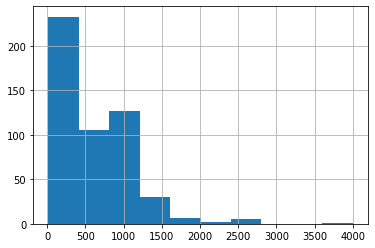

In [ ]:
# Histogram of all columns were displayed. 
# There is no problem about data distribution we realized.  
dfTrain['storage'].hist(bins=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f2c93f5c0>,
      dtype=object)

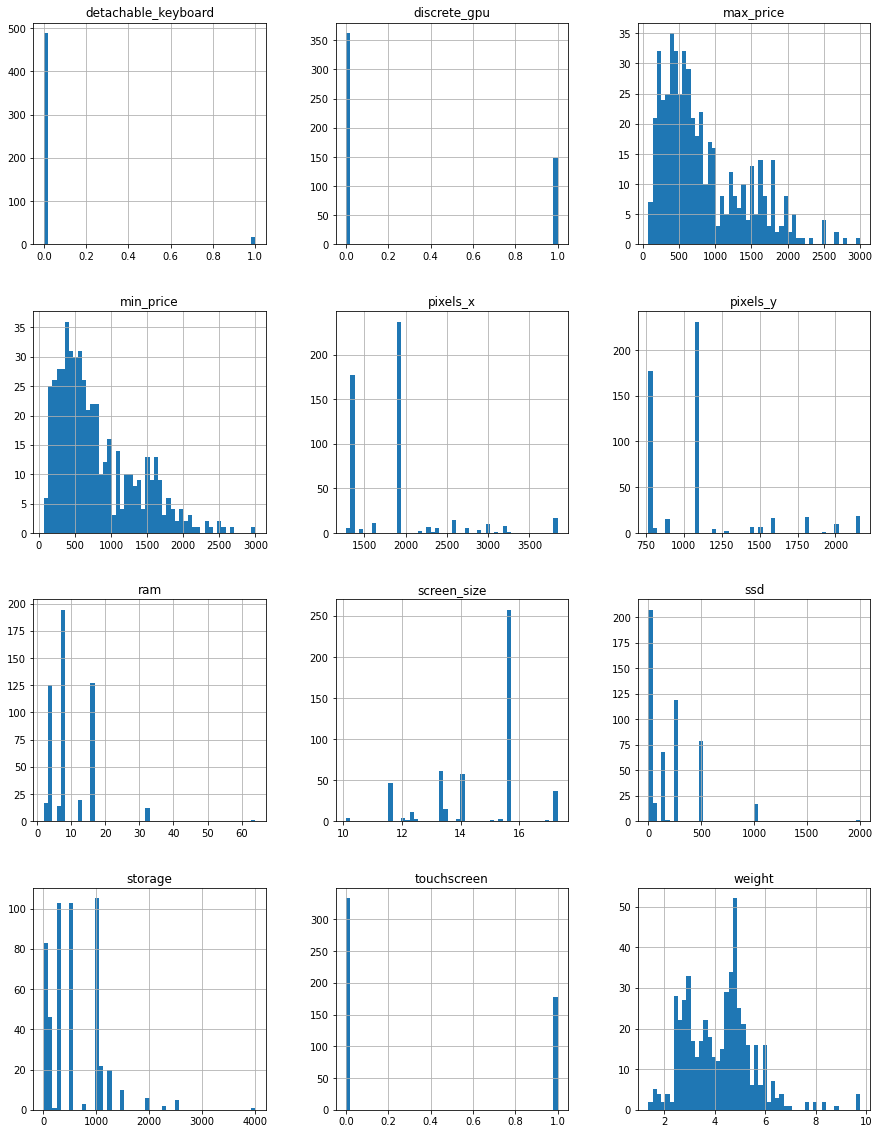

In [ ]:
## checking using histograms whether or not we have data errors.
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dfTrain.drop("id",axis=1).hist(ax = ax,bins=50)

In [ ]:
# Get simple data statistics based on nominal features . 
dfTrain.describe(include=['object'])

,name,brand,base_name,screen_surface,cpu,cpu_details,gpu,os,os_details
count,510,510,510,498,510,504,508,508,508
unique,510,18,385,4,23,132,73,4,20
top,"2020 HP 15.6"" Touchscreen Laptop Computer/ 10t...",Dell,HP,Glossy,Intel Core i7,Intel Core i7-9750H 2.6 GHz (9th gen Coffee La...,Intel UHD 620,Windows,Windows 10 Home
freq,1,108,9,257,181,41,69,431,253


# 1.2 Filling Missing Values in Traning Set
## 1.2.1 Nominal Features 
After examination of nominal features, it was found [ detachable_keyboard,weight ] have some missing values. Let's fill them. 


In [ ]:
# Missing values at [ detachable_keyboard,weight ] 
# Start with WEIGHT column.

dfTrain[dfTrain['weight'].isnull()].describe()
# Weight column -  missing data filling 
# { (screen_size, touchscreen, detachable_keyboard,discrete_gpu, ram	, storage)	* W = weight }


,id,screen_size,pixels_x,pixels_y,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,min_price,max_price
count,4.00000,4.000000,4.000000,4.000000,4.00,4.00,4.0,4.0,4.0,4.000000,0.0,4.000,4.000000
mean,24966.00000,14.650000,1541.500000,887.000000,0.75,0.25,0.0,5.5,8.0,1008.000000,NaN,464.485,480.487500
std,3689.54803,3.137409,286.279001,140.413675,0.50,0.50,0.0,3.0,16.0,803.485739,NaN,284.856,289.891734
min,21221.00000,10.100000,1280.000000,768.000000,0.00,0.00,0.0,2.0,0.0,32.000000,NaN,133.950,133.950000
25%,22085.75000,14.225000,1344.500000,792.000000,0.75,0.00,0.0,3.5,0.0,758.000000,NaN,277.980,303.487500
50%,25209.50000,15.600000,1483.000000,850.000000,1.00,0.00,0.0,6.0,0.0,1000.000000,NaN,487.495,504.500000
75%,28089.75000,16.025000,1680.000000,945.000000,1.00,0.25,0.0,8.0,8.0,1250.000000,NaN,674.000,681.500000
max,28224.00000,17.300000,1920.000000,1080.000000,1.00,1.00,0.0,8.0,32.0,2000.000000,NaN,749.000,779.000000


## 1.2.1.a "WEIGHT" Column
In this column, we used linear regression to find weight. Correlation between whole features and weight were displayed and then it as concluded that ["screen_size", "touchscreen", "detachable_keyboard","discrete_gpu", "ram"	, "storage"] affects weight so that a linear regression was generated to find missing weight values.  

In [ ]:
# # Weight column -  missing data filling  by linear regression 
# { screen_size, touchscreen, detachable_keyboard,discrete_gpu, ram	, storage	* W = weight }
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dfTrain_ = dfTrain.dropna(how='any',axis=0) 

target = dfTrain_["weight"]
features = dfTrain_[["screen_size", "touchscreen", "detachable_keyboard","discrete_gpu", "ram"	, "storage"]]

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=30,shuffle=True)
##initializing the linear model
model = LinearRegression()
##fitting the data
model.fit(X_train,y_train)
## predictions
y_predicted=model.predict(X_test)

print("mse of training data is :",mean_squared_error(y_predicted,y_test))



mse of training data is : 0.33792550942693755


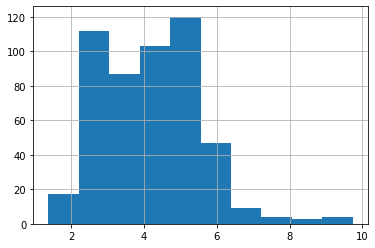

In [ ]:
# control weight of the computers to see any un-logical values. 
dfTrain['weight'].hist()

# Some beneficial Codes 
#dfTrain.corr()
#dfTrain[dfTrain.isna().any(axis=1)]


In [ ]:
# Filling missing Weight values 
# Find missing rows 
tmpFrame = dfTrain[dfTrain['weight'].isnull()]
# Exctract only required columns 
tmpList = tmpFrame[["screen_size", "touchscreen", "detachable_keyboard","discrete_gpu", "ram"	, "storage"]]

# Model is already created in the upper part.  
tmpPredict=model.predict(tmpList)

ndX = 0 
# update predicted values. 
for index, row in dfTrain.iterrows():
    if(pd.isnull(row['weight'])):
        print('There is a missing value in weight column')
        dfTrain.loc[index, 'weight'] = tmpPredict[ndX]
        print('It is filled.\n')
        ndX = ndX + 1 



# Let's control weight is updated or NOT. 
dfTrain[dfTrain['weight'].isnull()]



There is a missing value in weight column
It is filled.

There is a missing value in weight column
It is filled.

There is a missing value in weight column
It is filled.

There is a missing value in weight column
It is filled.



,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,min_price,max_price


## 1.2.1.b "DETACHABLE_KEYBOARD" Column
In this column, we used mode of the column to fill missing values. 

In [ ]:
# The second missing element is detachable_keyboard. We used mode of this column to fill data. 

print("\nMost frequent element of detachable_keyboard column is : " + str(dfTrain['detachable_keyboard'].mode()[0]))

dfTrain['detachable_keyboard'].fillna(dfTrain['detachable_keyboard'].mode()[0], inplace=True)
print("\nMissing data is filled") 

print ("\nUnique elements of detachable keyboard is  : "  + str (dfTrain['detachable_keyboard'].unique()) )

print ("")

# Check is there any missing values 
dfTrain[dfTrain['detachable_keyboard'].isnull()]


Most frequent element of detachable_keyboard column is : 0.0

Missing data is filled

Unique elements of detachable keyboard is  : [0. 1.]



,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,min_price,max_price


In [ ]:
# Data EXPLORATION. 
# Until now, two features were filled. Go on with numerical data exploration to seek any anomalies. 

dfTrain.describe()


,id,screen_size,pixels_x,pixels_y,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,min_price,max_price
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,21748.831373,14.648235,1865.972549,1074.564706,0.347059,0.035294,0.290196,9.590196,198.909804,574.749020,4.198621,793.677686,829.228000
std,7344.314902,1.606050,565.111787,354.346764,0.476502,0.184703,0.454298,6.246940,244.424611,517.445695,1.347560,543.619499,570.076909
min,3841.000000,10.100000,1280.000000,768.000000,0.000000,0.000000,0.000000,2.000000,0.000000,16.000000,1.203747,69.000000,76.000000
25%,18547.750000,13.300000,1366.000000,768.000000,0.000000,0.000000,0.000000,4.000000,0.000000,128.000000,3.020000,380.110000,399.225000
50%,23196.500000,15.600000,1920.000000,1080.000000,0.000000,0.000000,0.000000,8.000000,128.000000,500.000000,4.315000,638.500000,649.000000
75%,27881.500000,15.600000,1920.000000,1080.000000,1.000000,0.000000,1.000000,16.000000,256.000000,1000.000000,4.947500,1099.742500,1179.742500
max,31422.000000,17.300000,3840.000000,2160.000000,1.000000,1.000000,1.000000,64.000000,2000.000000,4000.000000,9.740000,2999.110000,2999.110000


## 1.2.2 Categorical Features
Now, go on analysis by looking at categorical features. 
We detected missing values at these columns respectively [ screen_surface , cpu_details , gpu , os , os_details ] 



### 1.2.2.a "SCREEN_SURFACE" Column

In [ ]:
# Now, looking at statistics of screen_surface. 
dfTrain[dfTrain['screen_surface'].isnull()].describe(include=['object'])

,name,brand,base_name,screen_surface,cpu,cpu_details,gpu,os,os_details
count,12,12,12,0,12,12,11,12,12
unique,12,7,12,0,6,9,7,2,4
top,Lenovo Premium Built High Performance 15.6 inc...,Lenovo,Acer Aspire E,NaN,Intel Celeron,Intel Celeron N3060 1.6 GHz (Braswell Dual-Core),Intel HD 400,Windows,Windows 10
freq,1,4,1,NaN,6,3,4,11,6


In [ ]:
# There is a typo in this column. Firstly, let's edit it. 

print("Pre-editing : " + str(dfTrain['screen_surface'].unique()))
# It includes some typo elements such as Glossy  and  glossy. Let's correct them. 
dfTrain["screen_surface"].replace({"glossy": "Glossy"}, inplace=True)
dfTrain["screen_surface"].replace({"matte": "Matte"}, inplace=True)
print("Post-editing : " + str(dfTrain['screen_surface'].unique()))




Pre-editing : ['Glossy' 'Matte' nan 'glossy' 'matte']
Post-editing : ['Glossy' 'Matte' nan]


In [ ]:
# Go on analysis for screen_surface. Other columns do not say something important. 
# Take mode of this column. 

# Possible outcomes of this feature column
print("Possible outcome is : "  + str( dfTrain['screen_surface'].unique()) ) 

#df.select_dtypes(include='object').fillna(\
# ...: df.select_dtypes(include='object').mode().iloc[0])

# Print and Replace nan with mode of this column 
print("Most frequent element of this column is : " + str(dfTrain['screen_surface'].mode()[0]))

dfTrain['screen_surface'].fillna(dfTrain['screen_surface'].mode()[0], inplace=True)
print("Missing values are filled")

# New outcomes of this feature column
print("Possible outcome is : "  + str( dfTrain['screen_surface'].unique()) ) 

print("")
# Let's control is it null or not. 
dfTrain[dfTrain['screen_surface'].isnull()]


Possible outcome is : ['Glossy' 'Matte' nan]
Most frequent element of this column is : Glossy
Missing values are filled
Possible outcome is : ['Glossy' 'Matte']



,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,min_price,max_price


### 1.2.2.b "CPU_DETAILS" Column
The next one is cpu_details. cpu is short version of cpu_details. (i.e. cpu_details includes cpu information). If there is a missing value in cpu_details, we extraced cpu column of these rows and then search this cpu contained potential candidates. Finally, taking mode from potential candidates pool. For example;  if cpu is intel, we fill cpu_details by looking mode of cpu_details which contains intel. 


In [ ]:
# cpu = Intel Pentium	 
# cpu_details = Intel Pentium N4200 1.1 GHz (Apollo Lake Quad-...
# we used mode of this feature vector. 
                                           
# Possible outcomes of this feature column
cpuTmpList = dfTrain[dfTrain['cpu_details'].notnull()] #df[df.Last_Name.notnull()]
cpuTmpList_ = cpuTmpList['cpu_details']
cpuTmpList_ = cpuTmpList_.tolist()


from statistics import mode

for index, row in dfTrain.iterrows():
    if(pd.isnull(row['cpu_details'])):
        print('There is a missing value in cpu_details')
        matching = [s for s in cpuTmpList_ if row['cpu'] in s]
        fillElement = mode(matching)
        dfTrain.loc[index, 'cpu_details'] = fillElement
        print('It is filled.\n')


print(" ")
# Let's control is it filled or NOT. 
# dfTrain['cpu_details'].unique()
dfTrain[dfTrain['cpu_details'].isnull()]


There is a missing value in cpu_details
It is filled.

There is a missing value in cpu_details
It is filled.

There is a missing value in cpu_details
It is filled.

There is a missing value in cpu_details
It is filled.

There is a missing value in cpu_details
It is filled.

There is a missing value in cpu_details
It is filled.

 


,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,min_price,max_price


### 1.2.2.c "GPU", "OS" and "OS_DETAILS" Column

It was examined and added manually. 

In [ ]:
# [ gpu , os , os_details  ] will be investigated. 

## GPU
dfTrain["gpu"].fillna("Intel HD",inplace=True)

## OS filling
dfTrain.os.iloc[310]="Windows"
dfTrain.os.iloc[395]="macOS"

##OS DETAILS
dfTrain.os_details.iloc[310]="Windows 10 Home"
dfTrain.os_details.iloc[395]="macOS Mojave"




/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# 1.3 Filling Missing Values in Test Set

In [ ]:
dfTest = pd.read_csv("test.csv")
dfTest.head()

,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight
0,28807,ASUS ZenBook Flip S Touchscreen Convertible La...,Asus,Asus ZenBook Flip S UX370UA,13.3,1920.0,1080.0,Glossy,1,Intel Core i7,Intel Core i7-8550U 1.8 GHz (8th gen Kaby Lake...,0,0,Intel UHD 620,Windows,Windows 10 Pro,16,512,512,2.42
1,22559,Dell Inspiron 15 Intel Core i3-7130U 8GB 1TB H...,Dell,Dell Inspiron 3567,15.6,1366.0,768.0,Matte,0,Intel Core i3,Intel Core i3-7130U 2.7 GHz (7th gen Kaby Lake...,0,0,Intel HD 620,Windows,Windows 10 Home,8,0,1000,4.95
2,28647,Asus Vivobook S15 S512 Thin and Light 15.6â€ ...,Asus,Asus VivoBook S512FA,15.6,1920.0,1080.0,Matte,0,Intel Core i7,Intel Core i7-8565U 1.8 GHz (8th gen Whiskey L...,0,0,Intel UHD 620,Windows,Windows 10 Home,8,256,1256,4.00
3,22141,"HP 15.6"" HD Touchscreen Laptop PC, Intel Core ...",HP,HP,15.6,1366.0,768.0,Glossy,1,Intel Core i5,Intel Core i5-7200U 2.5 GHz (7th gen Kaby Lake...,0,0,Intel HD 620,Windows,Windows 10 Home,8,128,2128,4.52
4,26116,"MSI GS75 Stealth-093 17.3"" Razor Thin Bezel Ga...",MSI,MSI GS75 Stealth,17.3,1920.0,1080.0,Matte,0,Intel Core i7,Intel Core i7-8750H 2.2 GHz (8th gen Coffee La...,0,1,NVIDIA GeForce RTX 2080 Max-Q,Windows,Windows 10 Home,32,512,512,4.96


In [ ]:
# Examine Numerical Columns 
dfTest.describe()

,id,screen_size,pixels_x,pixels_y,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight
count,222.000000,222.000000,220.000000,220.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,221.000000
mean,21760.477477,14.555315,1839.363636,1057.145455,0.373874,0.045045,0.333333,10.405405,223.261261,573.405405,4.174434
std,7343.771132,1.627806,495.056175,320.912962,0.484924,0.207872,0.472470,6.825396,260.033472,488.942351,1.347319
min,3900.000000,10.000000,1280.000000,768.000000,0.000000,0.000000,0.000000,2.000000,0.000000,16.000000,1.150000
25%,17743.250000,13.300000,1366.000000,768.000000,0.000000,0.000000,0.000000,4.000000,0.000000,136.000000,3.020000
50%,23714.500000,15.600000,1920.000000,1080.000000,0.000000,0.000000,0.000000,8.000000,128.000000,500.000000,4.300000
75%,27110.250000,15.600000,1920.000000,1080.000000,1.000000,0.000000,1.000000,16.000000,256.000000,1000.000000,4.850000
max,31424.000000,17.300000,3840.000000,2160.000000,1.000000,1.000000,1.000000,32.000000,1500.000000,2500.000000,9.740000


In [ ]:
# Examine Categorical Columns 
dfTest.describe(include = "object")

,name,brand,base_name,screen_surface,cpu,cpu_details,gpu,os,os_details
count,222,222,222,218,222,222,222,222,222
unique,221,15,196,4,17,84,59,3,14
top,Dell Inspiron 15 5000 Series 15.6 Inch Laptop...,Asus,Asus TUF Gaming FX504,Glossy,Intel Core i7,Intel Core i7-8750H 2.2 GHz (8th gen Coffee La...,Intel UHD 620,Windows,Windows 10 Home
freq,2,39,4,105,84,21,28,193,107


# 1.3.1 Numerical Columns - Missing Data 
Columns need to investigated :  [ pixels_x,pixels_y, screen_surface, weight ] 

### 1.3.1.a. Pixel X and Pixel Y Columns

In these columns, mode of the both columns according to training dataset were used. 

In [ ]:
## Fill pixels_x,pixels_y,

# Missing values at test set contains screen size 14.  
dfTmp = dfTrain[dfTrain['screen_size'] == 14]
dfTmpX = dfTmp['pixels_x'].mode()[0]
dfTmpY = dfTmp['pixels_y'].mode()[0]

print("Mode of pixel X is " + str(dfTmpX))  
print("Mode of pixel Y is " + str(dfTmpY)) 


dfTest['pixels_x'].fillna(dfTmpX, inplace=True)
dfTest['pixels_y'].fillna(dfTmpY, inplace=True)



Mode of pixel X is 1920
Mode of pixel Y is 1080


### 1.3.1.b. Screen Surface Column

In [ ]:
# Edit typo in screen_surface column. 
print("pre-editing : " + str(dfTest['screen_surface'].unique()))
# It includes some typo elements such as Glossy  and  glossy. Let's correct them. 
dfTest["screen_surface"].replace({"glossy": "Glossy"}, inplace=True)
dfTest["screen_surface"].replace({"matte": "Matte"}, inplace=True)
print("post-editing : " + str(dfTest['screen_surface'].unique()))


## Fill screen_surface
dfTest['screen_surface'].fillna(dfTrain['screen_surface'].mode()[0], inplace=True)
print("Missing values are filled in screen_surface column of test data")

pre-editing : ['Glossy' 'Matte' 'glossy' nan 'matte']
post-editing : ['Glossy' 'Matte' nan]
Missing values are filled in screen_surface column of test data


### 1.3.1.c. WEIGHT Column

In [ ]:
# ## Fill weight 
#print("\nMost frequent element of weight column is : " + str(dfTrain['weight'].mode()[0]))

#dfTest['weight'].fillna(dfTrain['weight'].mode()[0], inplace=True)
#print("\nMissing data is filled in test data") 

tmpFrameTest = dfTest[dfTest['weight'].isnull()]
tmpListTest = list()

tmpListTest = tmpFrameTest[["screen_size", "touchscreen", "detachable_keyboard","discrete_gpu", "ram"	, "storage"]]


# Model is already generated in the training data part.(upper*)
tmpPredictTest=model.predict(tmpListTest)

ndX = 0 
# update predicted values. 

for index, row in dfTest.iterrows():
    if(pd.isnull(row['weight'])):
        print('There is a missing value')
        dfTest.loc[index, 'weight'] = tmpPredictTest[ndX]
        print('It is filled.\n')
        ndX = ndX + 1 






There is a missing value
It is filled.



In [ ]:
# Print traning and test data respectively. 
print("Training Data Shape is : " +  str(dfTrain.shape))
print("Test Data Shape is : " + str(dfTest.shape))

Training Data Shape is : (510, 22)
Test Data Shape is : (222, 20)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


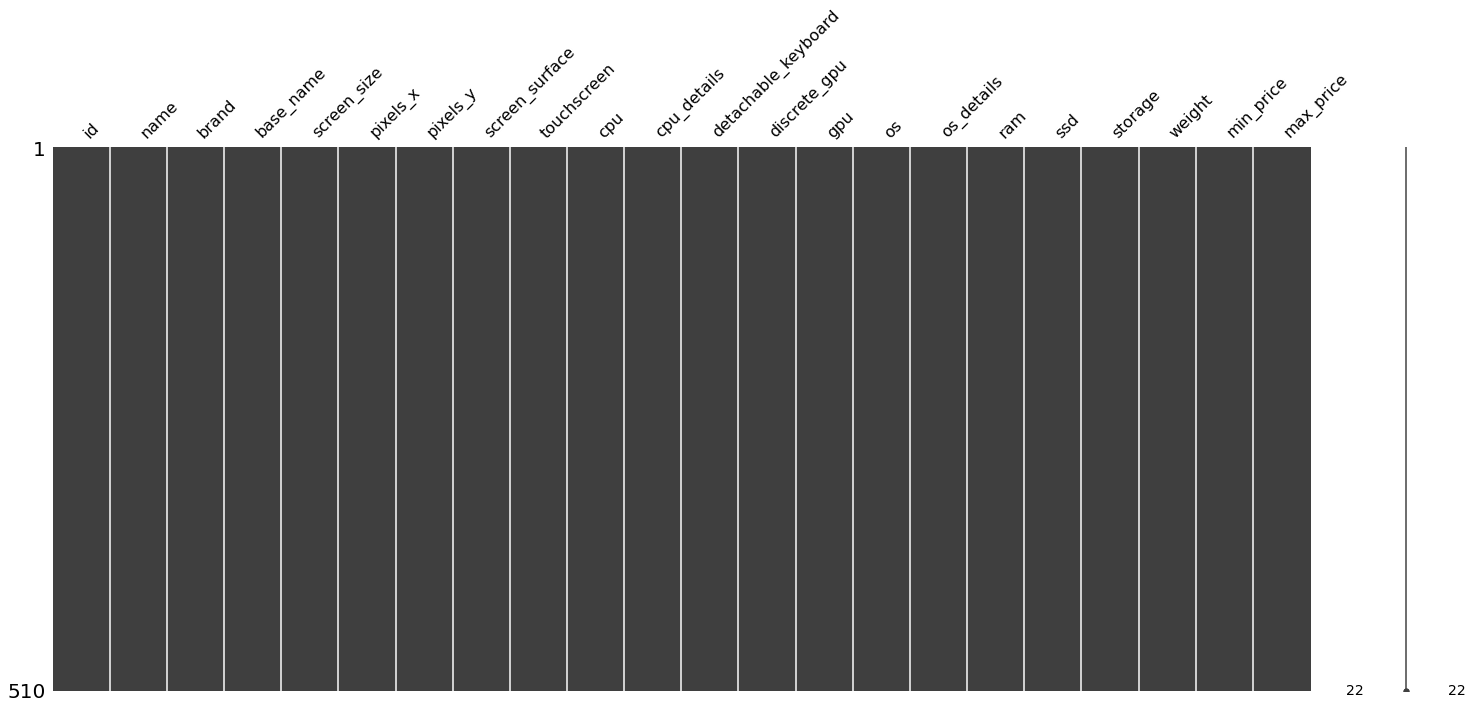

In [ ]:
# Visualize missing values as a matrix 
import missingno as msno 
msno.matrix(dfTrain) 

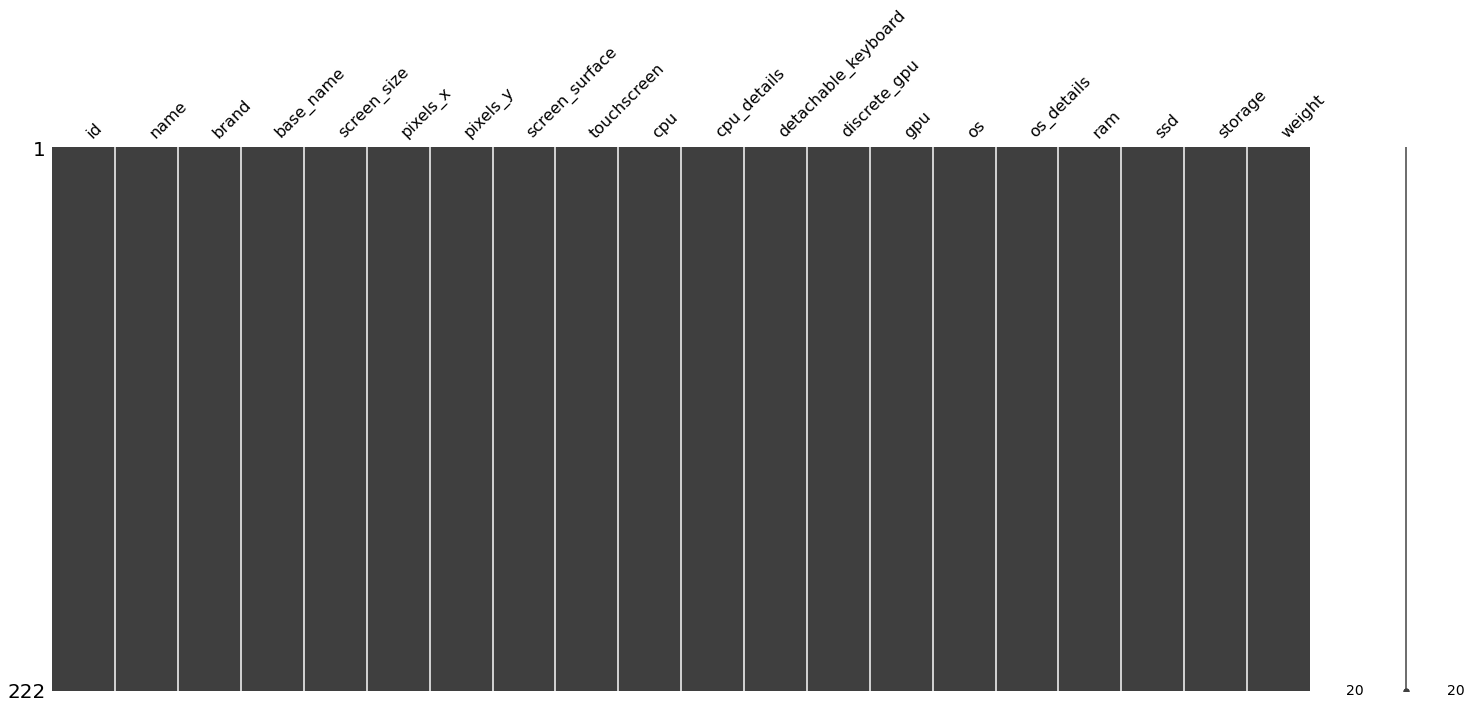

In [ ]:
# Visualize missing values as a matrix 
import missingno as msno 
msno.matrix(dfTest) 

# 1.4 Pre-Model Settings
Drop id columns of test and train data. Then, seperate Target column from training data. 

In [ ]:
# After missing data is filled, let's start to generate model. 
# Before doing it we need to convert categorical data into numerical one. 
dfTrain_ = dfTrain

dfTrain_ = dfTrain_.drop('id', 1)
dfTrain_ = dfTrain_.drop('min_price', 1)
dfTrain_ = dfTrain_.drop('max_price', 1)

dfTest_ = dfTest.drop('id', 1)

#Train data
print ("Train data shape is " + str (dfTrain_.shape))

# Test data
print ("Test data shape is " + str (dfTest_.shape))



Train data shape is (510, 19)
Test data shape is (222, 19)


# 1.5 Feature Engineering 
After missing data cases were handled, let's focus on to create some meaningful features. 

### 1.5.1 Name Column
It is obvious that gaming computer affects price significantly so that let's add a column which specifies computer as gaming or Not. 


In [ ]:
# Name column contains huge information. Let's add a column which specifies it as gaming or not. 
dfTrain_['name'] = dfTrain_['name'].str.lower()
dfTrain_['gaming_info'] = 0 
say = 0 
for index, row in dfTrain_.iterrows():
    if ('gaming' in row['name']) or ('nvidia geforce' in row['name']) :
        dfTrain_.loc[index, 'gaming_info'] = 1
        say = say + 1 

print("Training - Number of gaming computers are : " + str (say))



# Name column contains huge information. Let's add a column which specifies it as gaming or not. 
dfTest_['name'] = dfTest_['name'].str.lower()
dfTest_['gaming_info'] = 0 
say = 0 
for index, row in dfTest_.iterrows():
    if ('gaming' in row['name']) or ('nvidia geforce' in row['name']) :
        dfTest_.loc[index, 'gaming_info'] = 1
        say = say + 1 

print("Test - Number of gaming computers are : " + str (say))
print(" ")
print(" Gaming Info Column was generated for modeling... ")

Training - Number of gaming computers are : 115
Test - Number of gaming computers are : 57
 
 Gaming Info Column was generated for modeling... 


In [ ]:
dfTrain_.head()

,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,gaming_info
0,lenovo flex 3 15.6-inch touchscreen laptop (co...,Lenovo,Lenovo Flex 3 80JM002CUS,15.6,1920,1080,Glossy,1,Intel Core i7,Intel Core i7-5500U 2.40 GHz (5th gen Broadwel...,0.0,0,Intel HD,Windows,Windows 10,8,0,1000,4.60,0
1,razer blade 15 gaming laptop: intel core i7-87...,Razer,Razer Blade 15,15.6,1920,1080,Matte,0,Intel Core i7,Intel Core i7-8750H 2.2 GHz (8th gen Coffee La...,0.0,1,NVIDIA GeForce RTX 2070 Max-Q,Windows,Windows 10 Home,16,512,512,4.63,1
2,hp 15.6 inch hd thin and light laptop ( 7th ge...,HP,HP,15.6,1366,768,Glossy,0,AMD A6,AMD A6-9220 2.5 GHz (7th gen Stoney Ridge Dual...,0.0,0,AMD Radeon R4,Windows,Windows 10,8,0,500,4.63,0
3,"acer aspire e 15, 15.6"" full hd, 8th gen intel...",Acer,Acer Aspire E5-576,15.6,1920,1080,Matte,0,Intel Core i3,Intel Core i3-8130U 2.2 GHz (8th gen Kaby Lake...,0.0,0,Intel UHD 620,Windows,Windows 10 Home,6,0,1000,5.30,0
4,"hp 17.3 inch (1600 x 900) hd+ laptop pc, intel...",HP,HP 17,17.3,1600,900,Glossy,0,Intel Core i5,Intel Core i5-7200U 2.5 GHz (7th gen Kaby Lake...,0.0,0,Intel HD 620,Windows,Windows 10,8,0,1000,5.80,0


In [ ]:
""" # Name column contains huge information. Let's add a column which specifies it as gaming or not. 
# It need some update. Do not RUN it for now. 

import re 

dfTrain['cpu_avg'] = 0 

def digit_sum(n):
    num_str = str(n)
    sum = 0
    countNonZ = 0 
    for i in range(0, len(num_str)):
        sum += int(num_str[i])
        if num_str[i] != "0":
         countNonZ = countNonZ + 1 
    return sum/countNonZ


for index, row in dfTrain.iterrows():
        digitOnly = re.sub("[^0-9]", "", row['cpu_details'])
        if digitOnly == '':
         dfTrain.loc[index, 'cpu_avg'] = None
        else: 
         dfTrain.loc[index, 'cpu_avg'] = digit_sum(int(digitOnly)) """ 




' #\xa0Name column contains huge information. Let\'s add a column which specifies it as gaming or not. \n#\xa0It need some update. Do not RUN it for now. \n\nimport re \n\ndfTrain[\'cpu_avg\'] = 0 \n\ndef digit_sum(n):\n    num_str = str(n)\n    sum = 0\n    countNonZ = 0 \n    for i in range(0, len(num_str)):\n        sum += int(num_str[i])\n        if num_str[i] != "0":\n         countNonZ = countNonZ + 1 \n    return sum/countNonZ\n\n\nfor index, row in dfTrain.iterrows():\n        digitOnly = re.sub("[^0-9]", "", row[\'cpu_details\'])\n        if digitOnly == \'\':\n         dfTrain.loc[index, \'cpu_avg\'] = None\n        else: \n         dfTrain.loc[index, \'cpu_avg\'] = digit_sum(int(digitOnly)) '

# 1.6 Categorical to Numerical Conversion 
When we look at the data columns, there are 9 columns which need to be converted to numerical type. These are [name, brand, base_name, screen_surface, cpu, cpu_details, gpu, os, os_details]. 

### 1.6.1 Screen Surface Column 

It is the most easy one. It has 2 categories. Convert it to binary form. 

In [ ]:
# Categorical to Numerical Column Conversion. 
# [name, brand, base_name, screen_surface, cpu, cpu_details, gpu, os, os_details]
# The first column is screen_surface column. 


print( "BEFORE - Possible Outcomes of screen surface is : " + str ( dfTrain_['screen_surface'].unique()))

# Create a dictionary for it. 
screen_surface = {
     'Glossy' : '0',
     'Matte' : '1',
     }

# Remap the values of the dataframe 
dfTrain_.replace({"screen_surface": screen_surface}, inplace=True) 

print( "AFTER - Possible Outcomes of screen surface is : " + str ( dfTrain_['screen_surface'].unique()))





BEFORE - Possible Outcomes of screen surface is : ['Glossy' 'Matte']
AFTER - Possible Outcomes of screen surface is : ['0' '1']


In [ ]:
print( "BEFORE - Possible Outcomes of screen surface is : " + str ( dfTest_['screen_surface'].unique()))

# Create a dictionary for it. 
screen_surface = {
     'Glossy' : '0',
     'Matte' : '1',
     }

# Remap the values of the dataframe 
dfTest_.replace({"screen_surface": screen_surface}, inplace=True) 

print( "AFTER - Possible Outcomes of screen surface is : " + str ( dfTest_['screen_surface'].unique()))





BEFORE - Possible Outcomes of screen surface is : ['Glossy' 'Matte']
AFTER - Possible Outcomes of screen surface is : ['0' '1']


### 1.6.2 Brand Column 

In [ ]:
#dfTrain_['brand'] = dfTrain['brand']
#dfTest_['brand'] = dfTest['brand']

In [ ]:
# The second feature is "brand". Below you can see frequency table of this feature and following operations. 
 
# Show a brand dictionary 
print ("Show value counts of training brand column \n " + str (dfTrain_['brand'].value_counts())) 


# Decresase number of groups in this column. 
dfTrain_['brand'] = dfTrain_['brand'].str.lower()
print("Number of unique elements are " + str(len(dfTrain_['brand'].unique())))
print("\nNew categorization will be performed. ")

#Get first "13" for categorical elements and 1 more Other option. 
print("Getting first 13 elements in the category...")
print(dfTrain_['brand'].value_counts().index[0:12])

brandCheckList = (dfTrain_['brand'].value_counts().index[0:12].tolist())

for index, row in dfTrain_.iterrows():
    if not(row['brand'] in brandCheckList):
        #print('There is a missing value')
        dfTrain_.loc[index, 'brand'] = 'otherbrand'
        #print('It is filled.\n')


brandDict = dfTrain_['brand'].value_counts().to_dict() 



# Then, use brandDict to process test data. 
# Lower brand column in test data 
dfTest_['brand'] = dfTest_['brand'].str.lower()
# update categories - aligning according to traning data 
for index, row in dfTest_.iterrows():
    if not(row['brand'] in list(brandDict.keys())):
        print('There is a different brand value in test set.')
        dfTest_.loc[index, 'brand'] = 'otherbrand'
# new categories 
print ("Test data brand values : \n"  + str ( dfTest_['brand'].value_counts()))


print("Number of unique elements in the new categories are " + str(len(dfTrain_['brand'].unique())))
print("\nNew categorization were performed. ")


Show value counts of training brand column 
 Dell         108
HP            89
Asus          74
Lenovo        63
Acer          46
Apple         25
Microsoft     24
Other         22
MSI           16
Samsung       12
Alienware     10
Razer         10
LG             3
Google         2
Jumper         2
Huawei         2
Toshiba        1
RCA            1
Name: brand, dtype: int64
Number of unique elements are 18

New categorization will be performed. 
Getting first 13 elements in the category...
Index(['dell', 'hp', 'asus', 'lenovo', 'acer', 'apple', 'microsoft', 'other',
       'msi', 'samsung', 'alienware', 'razer'],
      dtype='object')
There is a different brand value in test set.
There is a different brand value in test set.
There is a different brand value in test set.
Test data brand values : 
asus          39
lenovo        39
hp            38
dell          38
acer          15
microsoft     10
samsung        8
msi            8
apple          8
alienware      7
other          5
razer 

In [ ]:
# After categorization were performed, let's implement one-hot encoding to convert them into numerical version. 
from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
# one hot for training
X_ = dfTrain_['brand']
X = color_ohe.fit_transform(dfTrain_.brand.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Brand_"+str(int(i)) for i in range(X.shape[1])])
X_ = pd.concat([X_, dfOneHot], axis=1)

# one hot for test
Y = color_ohe.transform(dfTest_.brand.values.reshape(-1,1)).toarray()
Y_ = dfTest_['brand']
dfOneHotY = pd.DataFrame(Y, columns = ["Brand_"+str(int(i)) for i in range(Y.shape[1])])
Y_ = pd.concat([Y_, dfOneHotY], axis=1)


# Concat both training and test set respoectively. 
#dfTrain_ = pd.concat([dfTrain_, dfOneHot], axis=1)
#dfTest_ = pd.concat([dfTest_, dfOneHot], axis=1)

# save variables for 
dfBrandTrain = dfOneHot 
dfBrandTest = dfOneHotY 
print("\n One Hot encoding in brand column were performed for training and test set respectively. ")




 One Hot encoding in brand column were performed for training and test set respectively. 


### 1.6.3 Base Name Column  

In [ ]:
# Third variable is base_name. It is important that base_name starts with brand name so 
# that we can extract the first element of this structure. Let's take only the second element of whole structure
# by removing remaining parts. 
dfTrain_['base_name'] = dfTrain_['base_name'].str.lower()
print("Number of unique elements are " + str(len(dfTrain_['base_name'].unique())))
print("\nNew categorization will be performed.")
tmpBase  = pd.DataFrame()
tmpB = dfTrain_["base_name"].str.split(" ", n = 4, expand = True)
tmpBase['base_name'] = tmpB[1]
# Get first "26" for categorical elements and 1 more Other option. 
print(tmpBase['base_name'].value_counts().index[0:25])


baseNameCheckList = (tmpBase['base_name'].value_counts().index[0:25].tolist())
for index, row in tmpBase.iterrows():
    if not(row['base_name'] in baseNameCheckList):
        #print('There is a missing value')
        tmpBase.loc[index, 'base_name'] = 'other'
        #print('It is filled.\n')


# Update new basename columns 
dfTrain_['base_name'] = tmpBase['base_name']
# New categories. 
baseNameDict = dfTrain_['base_name'].value_counts().to_dict() 
print(baseNameDict)


## -- ## 

# update test data according to new categories. 
dfTest_['base_name'] = dfTest_['base_name'].str.lower()

tmpBaseTest  = pd.DataFrame()
tmpBTest = dfTest_["base_name"].str.split(" ", n = 4, expand = True)
tmpBTest['base_name'] = tmpB[1]

say = 0 
for index, row in tmpBTest.iterrows():
    if not(row['base_name'] in list(baseNameDict.keys())):
        #print('There is a different value')
        tmpBTest.loc[index, 'base_name'] = 'other'
        say = say + 1 
        #print('It is filled.\n')
print('Total number of different values : ' + str(say))

# Update new basename columns 
dfTest_['base_name'] = tmpBTest['base_name']



Number of unique elements are 384

New categorization will be performed.
Index(['inspiron', 'chromebook', 'macbook', 'surface', 'ideapad', 'vivobook',
       'aspire', 'rog', 'zenbook', 'xps', 'thinkpad', 'yoga', 'pavilion',
       'blade', 'latitude', '17', 'flex', 'omen', 'stream', 'predator',
       'elitebook', 'spectre', 'tuf', '15', 'np7856'],
      dtype='object')
{'other': 128, 'inspiron': 77, 'chromebook': 42, 'macbook': 25, 'surface': 24, 'ideapad': 23, 'vivobook': 19, 'aspire': 18, 'rog': 16, 'zenbook': 16, 'xps': 14, 'thinkpad': 13, 'yoga': 12, 'pavilion': 11, 'blade': 10, 'latitude': 9, '17': 8, 'flex': 7, 'stream': 6, 'omen': 6, 'elitebook': 5, 'predator': 5, 'spectre': 4, 'np7856': 4, '15': 4, 'tuf': 4}
Total number of different values : 62


In [ ]:
# After categorization were performed, let's implement one-hot encoding to convert them into numerical version. 
from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
# one hot for training
X_ = dfTrain_['base_name']
X = color_ohe.fit_transform(dfTrain_.base_name.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["BaseName_"+str(int(i)) for i in range(X.shape[1])])
X_ = pd.concat([X_, dfOneHot], axis=1)

# one hot for test
Y = color_ohe.transform(dfTest_.base_name.values.reshape(-1,1)).toarray()
Y_ = dfTest_['base_name']
dfOneHotY = pd.DataFrame(Y, columns = ["BaseName_"+str(int(i)) for i in range(Y.shape[1])])
Y_ = pd.concat([Y_, dfOneHotY], axis=1)


# Concat both training and test set respoectively. 
#dfTrain_ = pd.concat([dfTrain_, dfOneHot], axis=1)
#dfTest_ = pd.concat([dfTest_, dfOneHot], axis=1)

# save variables for 
dfBaseTrain = dfOneHot 
dfBaseTest = dfOneHotY 
print("\n One Hot encoding in base name column were performed for training and test set respectively. \n")

# You can check correctness of one-hot encoded columns. 
# X_.drop_duplicates()
# Y_.drop_duplicates()


 One Hot encoding in base name column were performed for training and test set respectively. 



### 1.6.4 CPU Column

In [ ]:
# The next element is cpu but we can skip it because cpu_details has more informative columns.
# Let's use it in the feature selection step. Get first 15 row and make 
dfTrain_['cpu'] = dfTrain_['cpu'].str.lower()

cpuCheckList = (dfTrain_['cpu'].value_counts().index[0:15].tolist())

for index, row in dfTrain_.iterrows():
    if not(row['cpu'] in cpuCheckList):
        #print('There is a missing value')
        dfTrain_.loc[index, 'cpu'] = 'othercpu'
        #print('It is filled.\n')

print(dfTrain_['cpu'].value_counts())
cpuDict = dfTrain_['cpu'].value_counts().to_dict() 


## -- ## 

# Then update test data according to these train data. 
dfTest_['cpu'] = dfTest_['cpu'].str.lower()
# test data cpu categoties 
print(dfTest_['cpu'].value_counts())
print(" ")
# update categories - aligning according to traning data 
for index, row in dfTest_.iterrows():
    if not(row['cpu'] in list(cpuDict.keys())):
        print('There is a different cpu value in test set : ' + str (row['cpu']))
        dfTest_.loc[index, 'cpu'] = 'othercpu'

print(" ")
# new categories 
print ( dfTest_['cpu'].value_counts()) 

print ("\nPotential Categories in this column : " +  str (list(cpuDict.keys())))

intel core i7    181
intel core i5    138
intel celeron     69
intel core i3     30
intel pentium     17
amd ryzen 5       15
amd a6            14
intel core m3     13
othercpu           8
intel atom         7
amd a12            7
amd ryzen 3        3
amd ryzen 7        2
mediatek           2
amd a8             2
amd a9             2
Name: cpu, dtype: int64
intel core i7     84
intel core i5     61
intel celeron     31
intel core i3     10
amd ryzen 5        6
amd a6             5
intel pentium      5
mediatek           4
amd ryzen 7        4
intel core m3      2
amd a12            2
amd a9             2
intel core m       2
samsung exynos     1
amd a4             1
intel atom         1
intel core i9      1
Name: cpu, dtype: int64
 
There is a different cpu value in test set : intel core i9
There is a different cpu value in test set : samsung exynos
There is a different cpu value in test set : amd a4
There is a different cpu value in test set : intel core m
There is a different cpu val

In [ ]:
# After categorization were performed, let's implement one-hot encoding to convert them into numerical version. 
from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
# one hot for training
X_ = dfTrain_['cpu']
X = color_ohe.fit_transform(dfTrain_.cpu.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["cpu_"+str(int(i)) for i in range(X.shape[1])])
X_ = pd.concat([X_, dfOneHot], axis=1)

# one hot for test
Y = color_ohe.transform(dfTest_.cpu.values.reshape(-1,1)).toarray()
Y_ = dfTest_['cpu']
dfOneHotY = pd.DataFrame(Y, columns = ["cpu_"+str(int(i)) for i in range(Y.shape[1])])
Y_ = pd.concat([Y_, dfOneHotY], axis=1)


# Concat both training and test set respoectively. 
#dfTrain_ = pd.concat([dfTrain_, dfOneHot], axis=1)
#dfTest_ = pd.concat([dfTest_, dfOneHot], axis=1)

# save variables for 
dfCpuTrain = dfOneHot 
dfCpuTest = dfOneHotY 
print("\n One Hot encoding in cpu name column were performed for training and test set respectively. \n")

# You can check correctness of one-hot encoded columns. 
# X_.drop_duplicates()
# Y_.drop_duplicates()







 One Hot encoding in cpu name column were performed for training and test set respectively. 



In [ ]:
X_.head()

,cpu,cpu_0,cpu_1,cpu_2,cpu_3,cpu_4,cpu_5,cpu_6,cpu_7,cpu_8,cpu_9,cpu_10,cpu_11,cpu_12,cpu_13,cpu_14,cpu_15
0,intel core i7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,intel core i7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,amd a6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,intel core i3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,intel core i5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 1.6.5 CPU Details Column
In this column, number of cores in the processor and gHZ information of cpu were extracted as a different column to increase features. 

Rows not containing Core<bound method DataFrame.count of                                                   name  ... gaming_info
263  asus chromebook flip c101pa-db02 10.1inch rock...  ...           0

[1 rows x 20 columns]>
['Dual' 'Hexa' 'Quad' 'Octa']
[2 6 4 8]
Empty DataFrame
Columns: [name, brand, base_name, screen_size, pixels_x, pixels_y, screen_surface, touchscreen, cpu, cpu_details, detachable_keyboard, discrete_gpu, gpu, os, os_details, ram, ssd, storage, weight, gaming_info, Nbr of cores]
Index: []
Rows not containing GHz<bound method DataFrame.count of                                                   name  ... Nbr of cores
178  2018 newest premium dell inspiron 15.6" hd led...  ...            2
284  alienware fhd anw17-6429slv 17.3-inch gaming l...  ...            4

[2 rows x 21 columns]>
(510, 22)


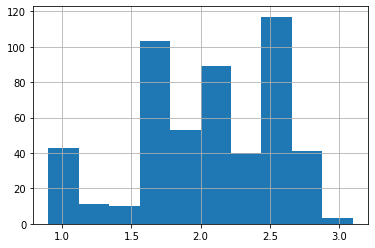

In [ ]:
# This cell extracts from cpu_details, nbr of cores and frequency  into new columns for dfTrain_
# for dfTrain_
print ('Rows not containing Core' + str(dfTrain_[~dfTrain_["cpu_details"].str.contains('-Core')].count))
# Id 263 does not contain -Core but Quad Cortex = Quad 
dfTrain_['Nbr of cores'] = dfTrain_["cpu_details"].str.split('-Core').str[0].str[-4:]
dfTrain_.loc[263,'Nbr of cores']= 'Quad'
print(dfTrain_['Nbr of cores'].unique())
dfTrain_.replace(['Dual','Quad','Hexa','Octa'],[2,4,6,8], inplace=True)
print(dfTrain_['Nbr of cores'].unique())
print(dfTrain_[dfTrain_['Nbr of cores'].isnull()])

print ('Rows not containing GHz' + str(dfTrain_[~dfTrain_["cpu_details"].str.contains('GHz')].count))
# Id 284 contain Ghz, we will go to lowercase
# Id 178 as no value, we will replace it with mode for cpu type
dfTrain_['Frequency'] = dfTrain_["cpu_details"].str.lower().str.split('ghz').str[0].str[-5:]
dfTrain_['Frequency'] = dfTrain_['Frequency'].str.split('.').str[0].str[-1:]+'.'+dfTrain_['Frequency'].str.split('.').str[1]
dfTrain_.loc[178,'Frequency'] = 0
dfTrain_['Frequency'] = dfTrain_['Frequency'].astype(float)
dfTrain_.loc[178,'Frequency'] = dfTrain_[dfTrain_['cpu'].str.lower().str.contains('celeron')]['Frequency'].mode()[0]
dfTrain_['Frequency'].hist()
print(dfTrain_.shape)

Rows not containing Core<bound method DataFrame.count of Empty DataFrame
Columns: [name, brand, base_name, screen_size, pixels_x, pixels_y, screen_surface, touchscreen, cpu, cpu_details, detachable_keyboard, discrete_gpu, gpu, os, os_details, ram, ssd, storage, weight, gaming_info]
Index: []>
['Quad' 'Dual' 'Hexa' 'Octa']
[4 2 6 8]
Empty DataFrame
Columns: [name, brand, base_name, screen_size, pixels_x, pixels_y, screen_surface, touchscreen, cpu, cpu_details, detachable_keyboard, discrete_gpu, gpu, os, os_details, ram, ssd, storage, weight, gaming_info, Nbr of cores]
Index: []
Rows not containing GHz<bound method DataFrame.count of Empty DataFrame
Columns: [name, brand, base_name, screen_size, pixels_x, pixels_y, screen_surface, touchscreen, cpu, cpu_details, detachable_keyboard, discrete_gpu, gpu, os, os_details, ram, ssd, storage, weight, gaming_info, Nbr of cores]
Index: []>
(222, 22)


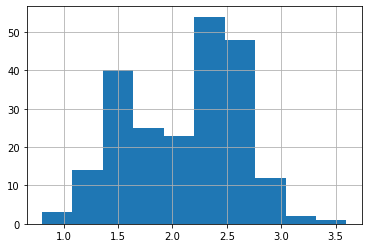

In [ ]:
# This cell extracts from cpu_details, nbr of cores and frequency  into new columns for dfTrain_
# for dfTest_
print ('Rows not containing Core' + str(dfTest_[~dfTest_["cpu_details"].str.contains('-Core')].count))
dfTest_['Nbr of cores'] = dfTest_["cpu_details"].str.split('-Core').str[0].str[-4:]
print(dfTest_['Nbr of cores'].unique())
dfTest_.replace(['Dual','Quad','Hexa','Octa'],[2,4,6,8], inplace=True)
print(dfTest_['Nbr of cores'].unique())
print(dfTest_[dfTest_['Nbr of cores'].isnull()])

print ('Rows not containing GHz' + str(dfTest_[~dfTest_["cpu_details"].str.lower().str.contains('ghz')].count))
dfTest_['Frequency'] = dfTest_["cpu_details"].str.lower().str.split('ghz').str[0].str[-5:]
dfTest_['Frequency'] = dfTest_['Frequency'].str.split('.').str[0].str[-1:]+'.'+dfTest_['Frequency'].str.split('.').str[1]
dfTest_['Frequency'] = dfTest_['Frequency'].astype(float)
dfTest_['Frequency'].hist()
print(dfTest_.shape)

### 1.6.5 GPU Column

In [ ]:
dfTrain['gpu'].value_counts()

Intel UHD 620                    69
Intel HD                         50
Intel HD 620                     50
Intel HD 400                     27
NVIDIA GeForce GTX 1060          18
                                 ..
AMD Radeon R2                     1
AMD Radeon Pro 555X               1
AMD Radeon R6                     1
PowerVR GX6250                    1
NVIDIA GeForce GTX 1650 Max-Q     1
Name: gpu, Length: 73, dtype: int64

In [ ]:
# Extract first element from gpu column. 
dfTrain_['gpu1'] = dfTrain_['gpu']

trainGpu = dfTrain_["gpu1"].str.split(" ", n = 6, expand = True)
# this will be categorized. 
trainGpu_ = pd.DataFrame()
trainGpu_['gpu1'] = trainGpu[0].str.lower()
dfTrain_['gpu1'] = trainGpu_['gpu1']

gpuCheckList = dfTrain_['gpu1'].value_counts().index[0:3].tolist()

for index, row in dfTrain_.iterrows():
    if not(row['gpu1'] in gpuCheckList):
        #print('There is a missing value')
        dfTrain_.loc[index, 'gpu1'] = 'othergpu'
        #print('It is filled.\n')

print(dfTrain_['gpu1'].value_counts())
gpuDict = dfTrain_['gpu1'].value_counts().to_dict() 

# Now do it for gpu1 for test set. 

dfTest_['gpu1'] = dfTest_['gpu']
testGpu = dfTest_["gpu"].str.split(" ", n = 6, expand = True)
testGpu.head()
testGpu_ = pd.DataFrame()

testGpu_['gpu1'] = testGpu[0].str.lower()
dfTest_['gpu1'] = testGpu_['gpu1']

print(dfTest_['gpu1'].value_counts())
print(" ")

# update categories - aligning according to traning data 
for index, row in dfTest_.iterrows():
    if not(row['gpu1'] in list(gpuDict.keys())):
        print('There is a different gpu value in test set : ' + str (row['gpu1']))
        dfTest_.loc[index, 'gpu1'] = 'othergpu'

print(" ")
# new categories 
print ( dfTest_['gpu1'].value_counts()) 

print ("\nPotential Categories in this column : " +  str (list(gpuDict.keys())))





intel       316
nvidia      143
amd          48
othergpu      3
Name: gpu1, dtype: int64
intel          124
nvidia          68
amd             24
powervr          3
mali-t604        1
intelâ iris      1
imagination      1
Name: gpu1, dtype: int64
 
There is a different gpu value in test set : powervr
There is a different gpu value in test set : mali-t604
There is a different gpu value in test set : powervr
There is a different gpu value in test set : imagination
There is a different gpu value in test set : intelâ iris
There is a different gpu value in test set : powervr
 
intel       124
nvidia       68
amd          24
othergpu      6
Name: gpu1, dtype: int64

Potential Categories in this column : ['intel', 'nvidia', 'amd', 'othergpu']


In [ ]:
dfTest_['gpu1'].unique()

array(['intel', 'nvidia', 'othergpu', 'amd'], dtype=object)

In [ ]:
# After categorization were performed, let's implement one-hot encoding to convert them into numerical version. 
from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
# one hot for training
X_ = dfTrain_['gpu1']
X = color_ohe.fit_transform(dfTrain_.gpu1.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["gpu1_"+str(int(i)) for i in range(X.shape[1])])
X_ = pd.concat([X_, dfOneHot], axis=1)

# one hot for test
Y = color_ohe.transform(dfTest_.gpu1.values.reshape(-1,1)).toarray()
Y_ = dfTest_['gpu1']
dfOneHotY = pd.DataFrame(Y, columns = ["gpu1_"+str(int(i)) for i in range(Y.shape[1])])
Y_ = pd.concat([Y_, dfOneHotY], axis=1)


# Concat both training and test set respoectively. 
#dfTrain_ = pd.concat([dfTrain_, dfOneHot], axis=1)
#dfTest_ = pd.concat([dfTest_, dfOneHot], axis=1)

# save variables for 
dfGpu1Train = dfOneHot 
dfGpu1Test = dfOneHotY 
print("\n One Hot encoding in cpu name column were performed for training and test set respectively. \n")

# You can check correctness of one-hot encoded columns. 
# X_.drop_duplicates()
# Y_.drop_duplicates()


 One Hot encoding in cpu name column were performed for training and test set respectively. 



In [ ]:
# Extract second element from gpu column. 

dfTrain_['gpu2'] = dfTrain_['gpu']

trainGpu2 = dfTrain_["gpu2"].str.split(" ", n = 6, expand = True)
# this will be categorized. 
trainGpu2_ = pd.DataFrame()
trainGpu2_['gpu2'] = trainGpu2[1].str.lower()
trainGpu2_['gpu2'].replace('gefoce', 'geforce', inplace = True)
dfTrain_['gpu2'] = trainGpu2_['gpu2']

print("Potential Candadites are :: " + str(dfTrain_['gpu2'].value_counts().index[0:5].tolist()))

gpuCheckList2 = dfTrain_['gpu2'].value_counts().index[0:5].tolist()

for index, row in dfTrain_.iterrows():
    if not(row['gpu2'] in gpuCheckList2):
        #print('There is a missing value')
        dfTrain_.loc[index, 'gpu2'] = 'othergpu2'
        #print('It is filled.\n')

print(dfTrain_['gpu2'].value_counts())
gpuDict2 = dfTrain_['gpu2'].value_counts().to_dict() 


# Now do it for gpu1 for test set. 
dfTest_['gpu2'] = dfTest_['gpu']
testGpu2 = dfTest_["gpu2"].str.split(" ", n = 6, expand = True)

testGpu2_ = pd.DataFrame()
testGpu2_['gpu2'] = testGpu2[1].str.lower()
dfTest_['gpu2'] = testGpu2_['gpu2']

print(dfTest_['gpu2'].value_counts())
print(" ")


# update categories - aligning according to traning data 
for index, row in dfTest_.iterrows():
    if not(row['gpu2'] in list(gpuDict2.keys())):
        print('There is a different gpu value in test set : ' + str (row['gpu2']))
        dfTest_.loc[index, 'gpu2'] = 'othergpu2'


print(" ")
# new categories 
print ( dfTest_['gpu2'].value_counts()) 

print ("\nPotential Categories in this column : " +  str (list(gpuDict2.keys())))





Potential Candadites are :: ['hd', 'geforce', 'uhd', 'radeon', 'iris']
hd           207
geforce      141
uhd           92
radeon        47
iris          17
othergpu2      6
Name: gpu2, dtype: int64
hd         83
geforce    67
uhd        36
radeon     24
iris        5
gx6250      3
plus        1
quadro      1
powervr     1
Name: gpu2, dtype: int64
 
There is a different gpu value in test set : gx6250
There is a different gpu value in test set : None
There is a different gpu value in test set : quadro
There is a different gpu value in test set : gx6250
There is a different gpu value in test set : powervr
There is a different gpu value in test set : plus
There is a different gpu value in test set : gx6250
 
hd           83
geforce      67
uhd          36
radeon       24
othergpu2     7
iris          5
Name: gpu2, dtype: int64

Potential Categories in this column : ['hd', 'geforce', 'uhd', 'radeon', 'iris', 'othergpu2']


In [ ]:
# After categorization were performed, let's implement one-hot encoding to convert them into numerical version. 
from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
# one hot for training
X_ = dfTrain_['gpu2']
X = color_ohe.fit_transform(dfTrain_.gpu2.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["gpu2_"+str(int(i)) for i in range(X.shape[1])])
X_ = pd.concat([X_, dfOneHot], axis=1)

# one hot for test
Y = color_ohe.transform(dfTest_.gpu2.values.reshape(-1,1)).toarray()
Y_ = dfTest_['gpu2']
dfOneHotY = pd.DataFrame(Y, columns = ["gpu2_"+str(int(i)) for i in range(Y.shape[1])])
Y_ = pd.concat([Y_, dfOneHotY], axis=1)


# Concat both training and test set respoectively. 
#dfTrain_ = pd.concat([dfTrain_, dfOneHot], axis=1)
#dfTest_ = pd.concat([dfTest_, dfOneHot], axis=1)

# save variables for 
dfGpu2Train = dfOneHot 
dfGpu2Test = dfOneHotY 
print("\n One Hot encoding in gpu name column were performed for training and test set respectively. \n")

# You can check correctness of one-hot encoded columns. 
# X_.drop_duplicates()
# Y_.drop_duplicates()






 One Hot encoding in gpu name column were performed for training and test set respectively. 



### 1.6.6. OS Column

In [ ]:
dfTrain_['os'] = dfTrain_['os'].str.lower()
dfTest_['os'] = dfTest_['os'].str.lower()

print("Training : ")
print ( str(dfTrain_['os'].value_counts()) )
print(" ")
print("Test : ")
print ( str(dfTest_['os'].value_counts()) )


Training : 
windows      432
chrome os     52
macos         25
android        1
Name: os, dtype: int64
 
Test : 
windows      193
chrome os     21
macos          8
Name: os, dtype: int64


In [ ]:
# After categorization were performed, let's implement one-hot encoding to convert them into numerical version. 
from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
# one hot for training
X_ = dfTrain_['os']
X = color_ohe.fit_transform(dfTrain_.os.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["os_"+str(int(i)) for i in range(X.shape[1])])
X_ = pd.concat([X_, dfOneHot], axis=1)

# one hot for test
Y = color_ohe.transform(dfTest_.os.values.reshape(-1,1)).toarray()
Y_ = dfTest_['os']
dfOneHotY = pd.DataFrame(Y, columns = ["os_"+str(int(i)) for i in range(Y.shape[1])])
Y_ = pd.concat([Y_, dfOneHotY], axis=1)


# Concat both training and test set respoectively. 
#dfTrain_ = pd.concat([dfTrain_, dfOneHot], axis=1)
#dfTest_ = pd.concat([dfTest_, dfOneHot], axis=1)

# save variables for 
dfOsTrain = dfOneHot 
dfOsTest = dfOneHotY 
print("\n One Hot encoding in OS name column were performed for training and test set respectively. \n")

# You can check correctness of one-hot encoded columns. 
# X_.drop_duplicates()
# Y_.drop_duplicates()





 One Hot encoding in OS name column were performed for training and test set respectively. 



# 1.7 MERGING FEATURE COLUMNS FOR MODEL

Firstly, let's determine dfTrain_ columns and then concatanate pre-determined columns above and finalize training and test set. 

In [ ]:
dfTrain_.head(2)

,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,gaming_info,Nbr of cores,Frequency,gpu1,gpu2
0,lenovo flex 3 15.6-inch touchscreen laptop (co...,lenovo,flex,15.6,1920,1080,0,1,intel core i7,Intel Core i7-5500U 2.40 GHz (5th gen Broadwel...,0.0,0,Intel HD,windows,Windows 10,8,0,1000,4.60,0,2,2.4,intel,hd
1,razer blade 15 gaming laptop: intel core i7-87...,razer,blade,15.6,1920,1080,1,0,intel core i7,Intel Core i7-8750H 2.2 GHz (8th gen Coffee La...,0.0,1,NVIDIA GeForce RTX 2070 Max-Q,windows,Windows 10 Home,16,512,512,4.63,1,6,2.2,nvidia,geforce


In [ ]:
columns1 = ['screen_size', 'pixels_x', 'pixels_y', 'screen_surface', 
            'touchscreen','detachable_keyboard', 'discrete_gpu' , 'ram' , 
            'ssd' ,'storage', 'weight', 'gaming_info', 'Nbr of cores', 'Frequency']

dfFinalTrain = dfTrain_[dfTrain_.columns.intersection(columns1)]  
dfFinalTrain.head()

,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,gaming_info,Nbr of cores,Frequency
0,15.6,1920,1080,0,1,0.0,0,8,0,1000,4.60,0,2,2.4
1,15.6,1920,1080,1,0,0.0,1,16,512,512,4.63,1,6,2.2
2,15.6,1366,768,0,0,0.0,0,8,0,500,4.63,0,2,2.5
3,15.6,1920,1080,1,0,0.0,0,6,0,1000,5.30,0,2,2.2
4,17.3,1600,900,0,0,0.0,0,8,0,1000,5.80,0,2,2.5


In [ ]:
columns1 = ['screen_size', 'pixels_x', 'pixels_y', 'screen_surface', 
            'touchscreen','detachable_keyboard', 'discrete_gpu' , 'ram' , 
            'ssd' ,'storage', 'weight', 'gaming_info', 'Nbr of cores', 'Frequency']

dfFinalTest = dfTest_[dfTest_.columns.intersection(columns1)]  
dfFinalTest.head()


,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,gaming_info,Nbr of cores,Frequency
0,13.3,1920.0,1080.0,0,1,0,0,16,512,512,2.42,0,4,1.8
1,15.6,1366.0,768.0,1,0,0,0,8,0,1000,4.95,0,2,2.7
2,15.6,1920.0,1080.0,1,0,0,0,8,256,1256,4.00,0,4,1.8
3,15.6,1366.0,768.0,0,1,0,0,8,128,2128,4.52,0,2,2.5
4,17.3,1920.0,1080.0,1,0,0,1,32,512,512,4.96,1,6,2.2


In [ ]:
# Combine generated structures in the previous section. 

# training structure : dfBrandTrain,dfBaseTrain,dfCpuTrain,dfGpu1Train,dfGpu2Train,dfOsTrain
# test structure : dfBrandTest,dfBaseTest,dfCpuTest,dfGpu1Test,dfGpu2Test,dfOsTest

dfTmpTrain = pd.DataFrame()
dfTmpTrain = pd.concat([dfTmpTrain, dfBrandTrain], axis=1)
dfTmpTrain = pd.concat([dfTmpTrain, dfBaseTrain], axis=1)
dfTmpTrain = pd.concat([dfTmpTrain, dfCpuTrain], axis=1)
dfTmpTrain = pd.concat([dfTmpTrain, dfGpu1Train], axis=1)
dfTmpTrain = pd.concat([dfTmpTrain, dfGpu2Train], axis=1)
dfTmpTrain = pd.concat([dfTmpTrain, dfOsTrain], axis=1)



dfTmpTest = pd.DataFrame()
dfTmpTest = pd.concat([dfTmpTest, dfBrandTest], axis=1)
dfTmpTest = pd.concat([dfTmpTest, dfBaseTest], axis=1)
dfTmpTest = pd.concat([dfTmpTest, dfCpuTest], axis=1)
dfTmpTest = pd.concat([dfTmpTest, dfGpu1Test], axis=1)
dfTmpTest = pd.concat([dfTmpTest, dfGpu2Test], axis=1)
dfTmpTest = pd.concat([dfTmpTest, dfOsTest], axis=1)


# Finalize DATAFRAME 
dfFinalTrain = pd.concat([dfFinalTrain, dfTmpTrain], axis=1)
dfFinalTest = pd.concat([dfFinalTest, dfTmpTest], axis=1)




In [ ]:
# Change data type. 
dfFinalTrain = dfFinalTrain.astype(float)
dfFinalTest = dfFinalTest.astype(float)

In [ ]:
print(dfFinalTrain.shape)
print(dfFinalTest.shape)

(510, 83)
(222, 83)


In [ ]:
#dfFinalTrain = pd.concat([dfFinalTrain, dfTrain['min_price']], axis=1)
#dfFinalTrain = pd.concat([dfFinalTrain, dfTrain['max_price']], axis=1)
#dfFinalTrain = pd.concat([dfFinalTrain, dfTrain['id']], axis=1)

#dfFinalTest = pd.concat([dfFinalTest, dfTest['id']], axis=1)

#dfFinalTrain.to_csv('trainFinal.csv',index=False, header=None)
#dfFinalTest.to_csv('testFinal.csv',index=False, header=None)


# 1.8 MODEL GENERATING

In [ ]:
# Import Libraries 
!pip install catboost
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import *
# !pip install catboost
from catboost import CatBoostRegressor, Pool, cv
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import xgboost as xgb
import numpy as np
from xgboost.sklearn import XGBRegressor
from scipy.sparse import coo_matrix, hstack
# One-hot encode the data using pandas get_dummies
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
import numpy as np 


     |████████████████████████████████| 64.8MB 65kB/s 


In [ ]:
# Assign training, test and target data. 
# Generate validation data to test training performance. 
features = dfFinalTrain
labels1 = dfTrain['min_price']
labels2 = dfTrain['max_price']

# Split the data into training and testing sets
train_features, val_features, train_labels, val_labels = train_test_split(features, labels1, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', val_features.shape)
print('Testing Labels Shape:', val_labels.shape)

Training Features Shape: (382, 83)
Training Labels Shape: (382,)
Testing Features Shape: (128, 83)
Testing Labels Shape: (128,)


## 1.8.1 Random Forest Method with 10Fold Cross Validation

In [ ]:
# RF with Cross Validation
from sklearn.model_selection import KFold
scores = []
errorsRF = []
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(features):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = features.iloc[train_index], features.iloc[test_index], labels2.iloc[train_index], labels2.iloc[test_index]
    rf.fit(X_train, y_train);
    predictions = rf.predict(X_test)
    tmp = np.mean(abs(predictions - y_test))
    errorsRF.append(tmp)
    print(tmp)

print("Average error is " + str (sum(errorsRF)/len(errorsRF)))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


120.97935706535955
218.271344603408
151.7234464276376
160.960544647525
163.97922869001005
151.35012040569563
159.86103747323367
157.17109914814733
213.64885265234938
107.62853162822863


## 1.8.2 Multi-layer Perceptron with 10Fold

In [ ]:
#MLP with 10-Fold Cross Validation
from sklearn.model_selection import KFold
scores = []
errorsMLP = []
nn = MLPRegressor(hidden_layer_sizes = (20,),
                  activation= 'identity', solver = 'lbfgs', alpha = 0.0001, max_iter = 2000,
                  verbose = True)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(features):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = features.iloc[train_index], features.iloc[test_index], labels1.iloc[train_index], labels1.iloc[test_index]
    nn.fit(X_train, y_train);
    predictions = nn.predict(X_test)
    tmp = np.mean(abs(predictions - y_test))
    errorsMLP.append(tmp)
    print("MAE is " + str(tmp))

print("Average error is " + str (sum(errorsMLP)/len(errorsMLP))) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 164.29423033244274


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 219.38968830892068


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 135.9104974563281


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 185.84356723844573


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 186.83863023017403


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 168.4080639921692


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 180.50929555079574


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 183.95564463984763


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE is 220.3264948218361
MAE is 150.60145520405612
Average error is 179.6077567775016


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### 1.8.3 XGBoost with 10-Fold

In [ ]:


from sklearn.model_selection import KFold
scores = []
errorsXGB = []
xgb = XGBRegressor(max_depth = 2, learning_rate = 0.03, nrounds = 90, objective = "reg:squarederror",
                  early_stopping_rounds = 3, eval_metric = "mae")
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(features,labels1):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = features.iloc[train_index], features.iloc[test_index], labels1.iloc[train_index], labels1.iloc[test_index]
    xgb.fit(X_train, y_train);
    predictions = xgb.predict(X_test)
    print(mean_absolute_error( predictions,y_test))
    tmp = np.mean(abs(predictions - y_test))
    errorsXGB.append(tmp)
    print("MAE is " + str(tmp))

print("Average error is " + str (sum(errorsXGB)/len(errorsXGB))) 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


144.35172928155637
MAE is 144.3517292815564
231.09717014686737
MAE is 231.09717014686737
142.40199192421107
MAE is 142.40199192421113
178.32272855870863
MAE is 178.32272855870866
172.98820442947687
MAE is 172.98820442947684
165.0419369087967
MAE is 165.0419369087967
160.04931954178153
MAE is 160.04931954178153
140.928321796492
MAE is 140.92832179649204
210.11621967390474
MAE is 210.1162196739047
156.1727674297258
MAE is 156.1727674297258
Average error is 170.1470389691521


### 1.8.4 ElasticNET with 10-Fold

In [ ]:
from sklearn.model_selection import KFold
scores = []
errorsEN = []
en = ElasticNet(alpha = 0.005, l1_ratio = 0.6, normalize = True, random_state = 712)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(features,labels1):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = features.iloc[train_index], features.iloc[test_index], labels1.iloc[train_index], labels1.iloc[test_index]
    en.fit(X_train, y_train);
    predictions = en.predict(X_test)
    tmp = mean_absolute_error( predictions,y_test)
    print(tmp)
    errorsEN.append(mean_absolute_error( predictions,y_test))


print("Average error is " + str (sum(errorsEN)/len(errorsEN)))

146.3133119301667
246.88855337111102
137.51830945901958
185.46394946096495
182.70732833779314
162.31844316647837
180.85945636163623
177.12055040584883
224.41037638577964
161.81760863984306
Average error is 180.54178875186417


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### 1.8.5 CatBoost Regressor with 10-fold

In [ ]:
from sklearn.model_selection import KFold
scores = []
errorsCB = []
cb_final = CatBoostRegressor(iterations=800, objective = 'MultiRMSE', eval_metric = 'MultiRMSE',
                          learning_rate=0.04, verbose = False,
                          depth=10, l2_leaf_reg = 0.2)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(features,labels1):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = features.iloc[train_index], features.iloc[test_index], labels2.iloc[train_index], labels2.iloc[test_index]
    cb_final.fit(X_train, y_train);
    predictions = cb_final.predict(X_test)
    print(mean_absolute_error( predictions,y_test))
    errorsCB.append(mean_absolute_error( predictions,y_test))


print(sum(errorsCB) / len(errorsCB))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


124.22990955400766
231.88933448640051
131.52756073124254
169.7576397180427
167.8788663075096
150.97244197481774
149.69473110503486
134.29575209672143
198.0466673886923
112.26410963720853
157.05570129996778


# 1.9 Model Evaluation 

Text(0, 0.5, 'Mean Absolute Error')

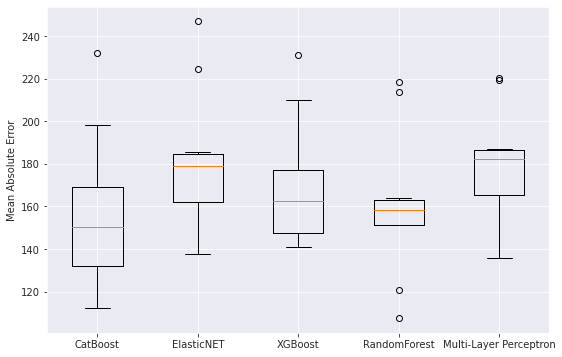

In [ ]:
# errorsCB errorsEN errorsXGB errorsRF errorsMLP
## numpy is used for creating fake data
import numpy as np 
import matplotlib as mpl 
## agg backend is used to create plot as a .png file
mpl.use('agg')
import matplotlib.pyplot as plt 


data_to_plot = [np.array(errorsCB), np.array(errorsEN), np.array(errorsXGB), np.array(errorsRF), np.array(errorsMLP)]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


## Custom x-axis labels
ax.set_xticklabels(['CatBoost', 'ElasticNET', 'XGBoost', 'RandomForest', 'Multi-Layer Perceptron'])
ax.set_ylabel('Mean Absolute Error')


# Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')


## 1.10 Additional Stuff for Models 

### 1.10.1 Random Forest Generator

In [ ]:
# RF with 1 validatiom 
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 179.13 degrees.


### 1.10.2 Multi-layer Perceptron

In [ ]:
# MLP with 1 validation set. 
nn = MLPRegressor(hidden_layer_sizes = (10,),
                  activation= 'identity', solver = 'lbfgs', alpha = 0.0001, max_iter = 1000,
                  verbose = False)
nn.fit(train_features, train_labels)

# Getting output
y_pred = nn.predict(test_features)
mean_absolute_error(y_pred, test_labels) # Calculate MAE


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


192.58783679616613

### 1.10.3 XGBOOST

In [ ]:
# XGBOOST 1 VALIDATION SET
xgb = XGBRegressor(max_depth = 2, learning_rate = 0.03, nrounds = 90, objective = "reg:squarederror",
                  early_stopping_rounds = 3, eval_metric = "mae")
xgb.fit(train_features, train_labels)

# Getting output
y_pred = xgb.predict(test_features)
mean_absolute_error( y_pred,test_labels) # Calculate MAE


206.75361135005951

### 1.10.4 Elastic Net

In [ ]:
# 1 Validation Set
en = ElasticNet(alpha = 0.005, l1_ratio = 0.6, normalize = True, random_state = 712)
en.fit(train_features, train_labels)

# Getting output
y_pred = en.predict(test_features)
mean_absolute_error(y_pred,test_labels) # Calculate MAE

195.97493968436754

### 1.10.5 CatBoostRegressor

In [ ]:
cb_final = CatBoostRegressor(iterations=800, objective = 'MultiRMSE', eval_metric = 'MultiRMSE',
                          learning_rate=0.04, verbose = False,
                          depth=10, l2_leaf_reg = 0.2)

cb_final.fit(train_features, train_labels)

# Getting output
prediction2 = cb_final.predict(test_features)
mean_absolute_error(prediction2,test_labels) # Calculate MAE


180.10550605157792

## 1.11 RANDOM FOREST PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

# Getting output
prediction2 = rf_random.predict(test_features)
mean_absolute_error(prediction2,test_labels) # Calculate MAE




Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.9min finished


171.2975229248048

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

In [ ]:
best_GS = {'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
    

base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, val_features, val_labels)

best = RandomForestRegressor(bootstrap= False, max_depth =  100, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split =  5, n_estimators = 800)
best.fit(train_features, train_labels)
random_accuracy = evaluate(best, val_features, val_labels)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 179.1307 degrees.
Accuracy = 79.36%.
Model Performance
Average Error: 168.2469 degrees.
Accuracy = 79.02%.
Improvement of -0.43%.


## 1.12 Random Forest FEATURE IMPORTANCE

In [ ]:
# RF with 1 validatiom 
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(val_features)
# Calculate the absolute errors
errors = abs(predictions - val_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Saving feature names for later use
feature_list = list(train_features.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# cpu_11 : Intel Core i7 
# Brand_11  : Razer
# BaseName_3  : Blade
# BaseName_23 :  XPS
# CPU_10 : Intel Core i5
# GPU2_2 : Iris

Mean Absolute Error: 179.13 degrees.
Variable: ram                  Importance: 0.51
Variable: cpu_11               Importance: 0.17
Variable: pixels_x             Importance: 0.04
Variable: ssd                  Importance: 0.03
Variable: storage              Importance: 0.03
Variable: weight               Importance: 0.03
Variable: pixels_y             Importance: 0.02
Variable: Nbr of cores         Importance: 0.02
Variable: Brand_11             Importance: 0.02
Variable: BaseName_3           Importance: 0.02
Variable: screen_size          Importance: 0.01
Variable: Frequency            Importance: 0.01
Variable: BaseName_16          Importance: 0.01
Variable: BaseName_23          Importance: 0.01
Variable: cpu_10               Importance: 0.01
Variable: screen_surface       Importance: 0.0
Variable: touchscreen          Importance: 0.0
Variable: detachable_keyboard  Importance: 0.0
Variable: discrete_gpu         Importance: 0.0
Variable: gaming_info          Importance: 0.0
Variable

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


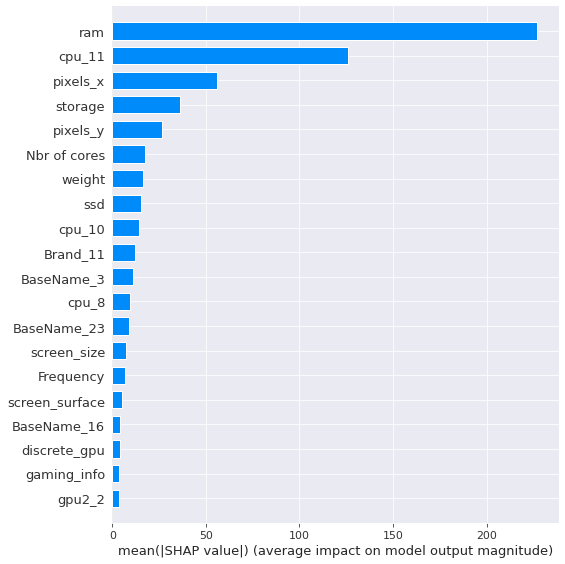

In [ ]:
#!pip install shap
import shap 
explainer = shap.TreeExplainer(rf).shap_values(train_features)
shap.summary_plot(explainer, train_features, plot_type="bar")


## 1.13 Finally, Random Forest performed good performance. Let's run with test data. 

In [ ]:
# predicting min price with best parameters. 

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf = RandomForestRegressor(bootstrap= False, max_depth =  100, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split =  5, n_estimators = 800
#)
# Train the model on training data
rf.fit(dfFinalTrain, labels1);

# Use the forest's predict method on the test data
predictions1 = rf.predict(dfFinalTest)



In [ ]:
# predicting max price 

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf = RandomForestRegressor(bootstrap= False, max_depth =  100, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split =  5, n_estimators = 800
#)

# Train the model on training data
rf.fit(dfFinalTrain, labels2);

# Use the forest's predict method on the test data
predictions2 = rf.predict(dfFinalTest)


In [ ]:
dfFinalResult = pd.DataFrame()
dfFinalResult['ID'] =  dfTest['id']
dfFinalResult['MIN'] = predictions1
dfFinalResult['MAX'] =  predictions2
dfFinalResult.head(20)





,ID,MIN,MAX
0,28807,1126.266760,1228.199571
1,22559,369.657964,383.427054
2,28647,793.235620,813.563860
3,22141,542.451883,555.769728
4,26116,1444.160989,1522.227737
5,27111,1449.202053,1489.748367
6,23420,721.392857,735.791360
7,21464,184.343431,184.328867
8,29405,678.607953,721.381770
9,27107,446.749492,439.749150


In [ ]:
dfFinalResult.to_csv('testNewFour.csv',index=False, header=None)